In [1]:
import argparse
from geo_parse.config import cfg
from demo.predictor import GeoDemo
import time
import matplotlib.pyplot as plt

CATEGORIES = {
            'sym':
                ["__background__", 
                "text", 
                "perpendicular", "head", "head_len",
                "angle","bar","parallel", 
                "double angle","double bar","double parallel", 
                "triple angle","triple bar","triple parallel",
                "quad angle", "quad bar", 
                "penta angle"],
            'geo':
                ["__background__", 
                "point","line","circle"
                ],
            'text':
                [
                "point", "line", "len", "angle", "degree", "area"  
                ]
            }

Using backend: pytorch


In [2]:
parser = argparse.ArgumentParser(description="PyTorch Geometry Parsing Demo")
parser.add_argument(
    "--config-file",
    default="../configs/PGDP5K/geo_MNV2_FPN.yaml",
    metavar="FILE",
    help="path to config file",
)
parser.add_argument(
    "--weights",
    default="../training_dir/PGDP5K_geo_MNV2_FPN/model_final.pth",
    metavar="FILE",
    help="path to the trained model",
)
parser.add_argument(
    "--text_content_path",
    default="../demo/text_content_gt.json",
    metavar="FILE",
    help="path to config file",
)
parser.add_argument(
    "--MODEL.DEVICE",
    type=int,
    default=0,
    help="Cuda device Num"
)
parser.add_argument(
    "opts",
    help="Modify model config options using the command-line",
    default=None,
    nargs=argparse.REMAINDER,
)
args = parser.parse_args(args=[])
cfg.merge_from_file(args.config_file)
cfg.merge_from_list(args.opts)
cfg.MODEL.WEIGHT = args.weights

In [3]:
geo_demo = GeoDemo(
    cfg,
    categories = CATEGORIES,
    text_content_path = args.text_content_path 
)

In [6]:
img_path = "../demo/demo_images/911.png"
start_time = time.time()
sym_img, point_img, line_img, circle_img, relation_each, logic_form_each= \
                                            geo_demo.run_on_opencv_image(img_path)
end_time = time.time()

print("{}\tinference time: {:.2f}s".format(img_path, end_time - start_time)) 

../demo/demo_images/911.png	inference time: 0.48s


(-0.5, 311.5, 275.5, -0.5)

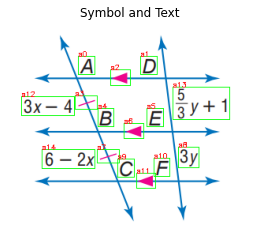

In [7]:
plt.title('Symbol and Text')
plt.imshow(sym_img[:,:,::-1])
plt.axis("off")


(-0.5, 311.5, 275.5, -0.5)

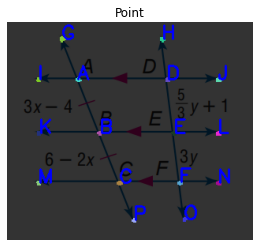

In [8]:
plt.title('Point')
plt.imshow(point_img[:,:,::-1])
plt.axis("off")

(-0.5, 311.5, 275.5, -0.5)

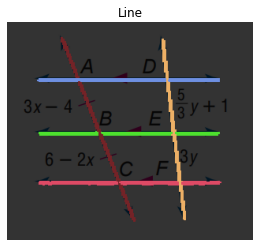

In [9]:
plt.title('Line')
plt.imshow(line_img[:,:,::-1])
plt.axis("off")

(-0.5, 311.5, 275.5, -0.5)

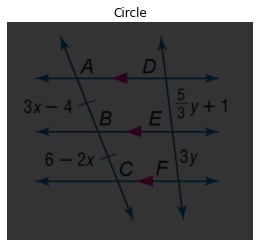

In [10]:
plt.title('Circle')
plt.imshow(circle_img[:,:,::-1])
plt.axis("off")

In [11]:
print(logic_form_each)

{'point_instances': ['A', 'D', 'B', 'E', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], 'line_instances': ['GA', 'GB', 'GC', 'GP', 'AB', 'AC', 'AP', 'BC', 'BP', 'CP', 'MC', 'MF', 'MN', 'CF', 'CN', 'FN', 'HD', 'HE', 'HF', 'HO', 'DE', 'DF', 'DO', 'EF', 'EO', 'FO', 'IA', 'ID', 'IJ', 'AD', 'AJ', 'DJ', 'KB', 'KE', 'KL', 'BE', 'BL', 'EL'], 'circle_instances': [], 'diagram_logic_forms': ['PointLiesOnLine(A, Line(G, B))', 'PointLiesOnLine(A, Line(G, C))', 'PointLiesOnLine(A, Line(G, P))', 'PointLiesOnLine(B, Line(G, C))', 'PointLiesOnLine(B, Line(G, P))', 'PointLiesOnLine(B, Line(A, C))', 'PointLiesOnLine(B, Line(A, P))', 'PointLiesOnLine(C, Line(G, P))', 'PointLiesOnLine(C, Line(A, P))', 'PointLiesOnLine(C, Line(B, P))', 'PointLiesOnLine(C, Line(M, F))', 'PointLiesOnLine(C, Line(M, N))', 'PointLiesOnLine(F, Line(M, N))', 'PointLiesOnLine(F, Line(C, N))', 'PointLiesOnLine(D, Line(H, E))', 'PointLiesOnLine(D, Line(H, F))', 'PointLiesOnLine(D, Line(H, O))', 'PointLiesOnLine(E, Line